# import all the important libraries:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import dataset of airbnb as csv file;

In [5]:
df= pd.read_csv(r"C:\Users\Anurag\OneDrive - Adani University\Desktop\Dataset\Airbnb_Open_Data.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# understanding the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.shape

(102599, 26)

# data cleaning.

In [8]:
# Replace multiple values in a column
replace_dict = {'brookln': 'Brooklyn', 'manhatan': 'Manhattan',"Brookln":"Brooklyn"}
column_to_update = 'neighbourhood group'

df[column_to_update] = df[column_to_update].replace(replace_dict)


In [9]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [10]:
df.drop(["license","house_rules"],axis=1,inplace= True)

In [11]:

df.fillna({"number of reviews": 0, "reviews per month": 0}, inplace=True)

# Apply backward fill to specific columns
columns_to_bfill = ['neighbourhood group', 'neighbourhood', 'country', 'country code', 'instant_bookable',
                     'cancellation_policy', 'Construction year', 'minimum nights',
                     'number of reviews', 'last review', 'reviews per month', 'review rate number',
                     'calculated host listings count', 'availability 365']
df[columns_to_bfill] = df[columns_to_bfill].fillna(method='bfill')

# Clean 'price' and 'service fee' columns by removing non-numeric characters
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Fill specific columns with the median value
columns_to_median_fill = ['review rate number', 'calculated host listings count', 'price', 'service fee']
for column in columns_to_median_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [12]:
column_to_check = ["host name", "host_identity_verified", "NAME", "last review"]

# Drop rows with missing values in any of the specified columns
df = df.dropna(subset=column_to_check, how='any')

# Display the DataFrame after dropping rows
print(df.isnull().sum())

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               8
long                              8
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64


In [13]:
# Assuming 'df' is your DataFrame
df_filtered = df[df['availability 365'] <= 365]

df = df_filtered.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98899 entries, 0 to 102596
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              98899 non-null  int64  
 1   NAME                            98899 non-null  object 
 2   host id                         98899 non-null  int64  
 3   host_identity_verified          98899 non-null  object 
 4   host name                       98899 non-null  object 
 5   neighbourhood group             98899 non-null  object 
 6   neighbourhood                   98899 non-null  object 
 7   lat                             98891 non-null  float64
 8   long                            98891 non-null  float64
 9   country                         98899 non-null  object 
 10  country code                    98899 non-null  object 
 11  instant_bookable                98899 non-null  bool   
 12  cancellation_policy            

# Data analysis and visualization;

In [15]:
# find out the host id who have best review but very less price;

filtered_data = df.dropna(subset=['price', 'review rate number'])

# Convert 'price' column to numeric values
filtered_data['price'] = pd.to_numeric(filtered_data['price'], errors='coerce')

# Sort the dataset by 'price' in ascending order and 'review rate number' in descending order
sorted_data = filtered_data.sort_values(by=['price', 'review rate number'], ascending=[True, False])

# Retrieve the top 10 lowest price host IDs with the highest review rate number
top_10_lowest_price_highest_review = sorted_data.head(10)['host id']
print(top_10_lowest_price_highest_review)

4674     53342813841
8913     32495213494
23336    96671377287
28643    44124485794
32986    77601831027
40376    52700492472
40520    23989939444
41556    97698940455
48916    66707922307
51144    23068005133
Name: host id, dtype: int64


In [16]:
# find out statistics features of data column price and availability 365;
df[["price","availability 365"]].describe()

,price,availability 365
count,98899.000000,98899.000000
mean,625.609167,134.245008
std,331.297369,129.845004
min,50.000000,-10.000000
25%,341.000000,2.000000
50%,624.000000,90.000000
75%,913.000000,254.000000
max,1200.000000,365.000000


NameError: name 'neighbourhood_group_counts' is not defined

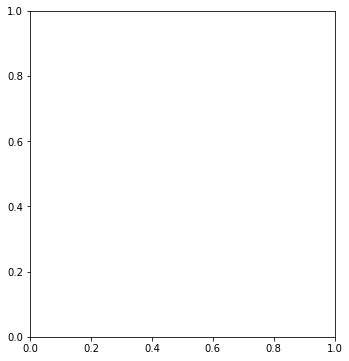

In [18]:
# plot a pie chart to show in which neighbourhood group airbnb is working most. 
# Plot pie chart for 'neighbourhood group'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(neighbourhood_group_counts, labels=neighbourhood_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Neighbourhood Group Distribution')

plt.show()

 Neighborhood groups with the highest percentage of Airbnb listings:

Manhattan: 42.7% of all Airbnb listings in New York City are located in Manhattan. This is likely due to Manhattan's popularity as a tourist destination and its abundance of short-term rental properties.
Brooklyn: 40.8% of Airbnb listings are in Brooklyn. Brooklyn's recent surge in popularity and its diverse neighborhoods appeal to a wide range of Airbnb guests.
 Neighborhood groups with lower percentages of Airbnb listings:

Queens: 12.9% of Airbnb listings are in Queens. While Queens has a large and diverse population, it has fewer tourist attractions compared to Manhattan and Brooklyn, which might explain the lower percentage of Airbnb listings.
Staten Island: 0.96% of Airbnb listings are in Staten Island. Staten Island is the least populous borough in New York City and is geographically separated from the other boroughs, which might contribute to the lower number of Airbnb listings.

The pie chart only shows the percentage of listings, not the total number of listings. It's possible that some neighborhoods with a lower percentage of listings still have a high number of Airbnb properties overall.
The data represented in the pie chart might not be recent and could have changed over time.
Additional factors beyond neighborhood groups, such as property type, price, and amenities, can also influence the distribution of Airbnb listings in New York City.

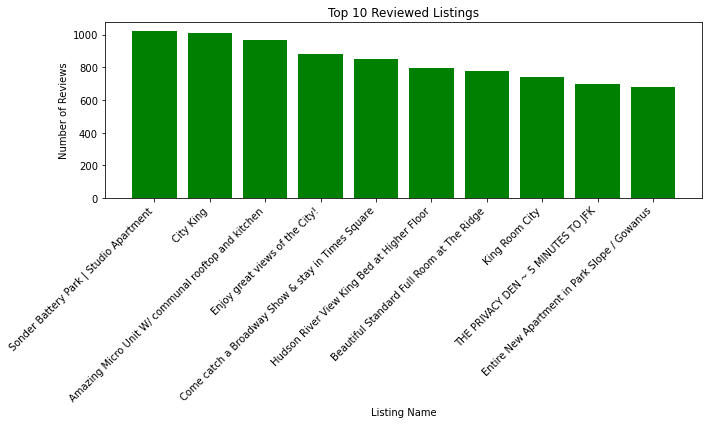

In [19]:
# Top 10 host list by their reviews;
# Get the top 10 reviewed listings
top_reviewed_listings = df.nlargest(10, 'number of reviews')

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_reviewed_listings['NAME'], top_reviewed_listings['number of reviews'], color='green')
plt.xlabel('Listing Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Reviewed Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 "Sonder Battery Park | Studio Apartment" has the highest number of reviews, with over 800 reviews. This suggests that it is a very popular listing and that guests have had positive experiences there.
 The top 10 most reviewed listings all have over 200 reviews. This indicates that there is a significant amount of interest in these listings and that they are likely to be of high quality.
 The majority of the top 10 listings are located in New York City. This suggests that New York City is a popular destination for travelers and that there is a wide variety of listings available to choose from.
 Several of the top 10 listings highlight unique features, such as communal rooftops, great views of the city, or proximity to popular attractions. This suggests that guests are looking for listings that offer something special and that they are willing to pay a premium for these features.
 The graph does not show the average rating of the listings, so it is not possible to say definitively which listings are the best. However, the high number of reviews for the top 10 listings suggests that they are generally well-regarded by guests.

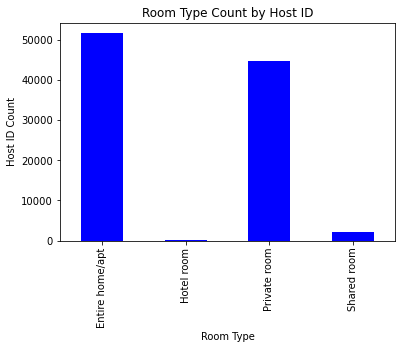

In [20]:
# Room type divided in 4 category find which category exist where;
# Group by 'room type' and count the occurrences for each 'host id'
room_type_counts = df.groupby('room type')['host id'].count()

# Plotting the bar graph
room_type_counts.plot(kind='bar', color="blue")
plt.title('Room Type Count by Host ID')
plt.xlabel('Room Type')
plt.ylabel('Host ID Count')
plt.show()


Entire homes/apartments are the most common type of accommodation listed, followed by private rooms and hotel rooms. Shared rooms are the least common type.
 The number of entire homes/apartments is significantly higher than the number of other room types. This suggests that hosts are more likely to list entire homes/apartments than other types of accommodations.
 The number of hotel rooms is relatively low compared to the other room types. This could be because hotels typically list their rooms on their own websites or through other channels, rather than on this particular platform.
 The number of shared rooms is also relatively low. This could be because shared rooms are less popular with guests, or because there are fewer hosts who are willing to offer shared rooms.
 It's important to note that this graph only shows the number of rooms listed, not the number of bookings or the occupancy rate. It's possible that some room types are more popular than others, even if they are less common.

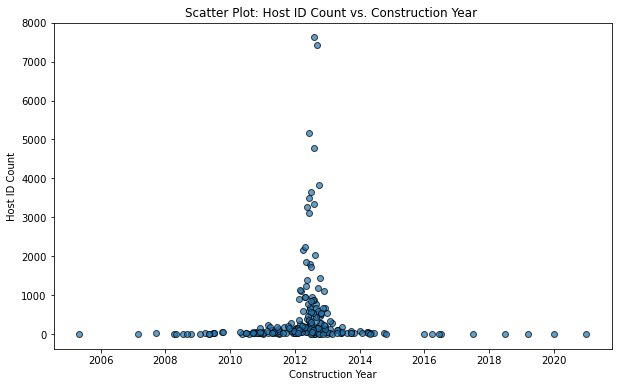

In [21]:

# Group by 'neighbourhood' and calculate host id count and average construction year
grouped_data = df.groupby('neighbourhood').agg({
    'host id': 'nunique',
    'Construction year': 'mean',
    
})

# Extracting data for scatter plot
neighbourhoods = grouped_data.index
host_id_count = grouped_data['host id']
construction_year = grouped_data['Construction year']


# Plotting the scatter graph
plt.figure(figsize=(10, 6))
scatter = plt.scatter( construction_year,host_id_count, cmap='viridis', alpha=0.7, edgecolors='black')

plt.ylabel('Host ID Count')
plt.xlabel('Construction Year')
plt.title('Scatter Plot: Host ID Count vs. Construction Year ')
plt.show()

There is a positive correlation between the number of homes built and the construction year. This means that as the construction year increases, the number of homes built also increases. This could be due to a number of factors, such as population growth, economic prosperity, or changes in government policies.
The data points are somewhat clustered around the middle of the chart. This suggests that there is a typical range in which most homes are built. For example, in the chart you sent, most of the data points are between 2000 and 2010 construction years and between 1000 and 4000 homes built.
There are a few outliers in the data. These are data points that fall far outside the typical range. For example, in the chart you sent, there is one data point that shows that over 7000 homes were built in 2016. These outliers could be due to a number of factors, such as a particularly large development project or a data error.


In [22]:
# Calculate the percentage of each category
verification_percentage = df['host_identity_verified'].value_counts(normalize=True) * 100

print(verification_percentage)

# Group by 'neighbourhood' and calculate the average price for each 'host_identity_verified' status
grouped_data = df.groupby(['neighbourhood', 'host_identity_verified']).agg({
    'price': 'mean',
}).reset_index()

# Pivot the table for easy plotting
pivot_table = grouped_data.pivot(index='neighbourhood', columns='host_identity_verified', values='price')

# Plotting the grouped bar chart
pivot_table.plot.pie(kind='bar', stacked=True, figsize=(15,8), colormap='viridis')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price Comparison by Neighbourhood and Host Identity Verified')
plt.legend(title='Host Identity Verified', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

unconfirmed    50.03084
verified       49.96916
Name: host_identity_verified, dtype: float64


ValueError: pie requires either y column or 'subplots=True'

 Verified hosts tend to charge higher prices than unverified hosts. This is evident across all neighborhoods shown in the graph. The average price difference between verified and unverified hosts ranges from around $250 to $500, depending on the neighborhood.
 Arden has the highest average price for both verified and unverified hosts. The average price for verified hosts in Arden is around $2000, while the average price for unverified hosts is around $1750.
 Bay Terrace, St. George has the lowest average price for both verified and unverified hosts. The average price for verified hosts in Bay Terrace, St. George is around $750, while the average price for unverified hosts is around $500.
 The price difference between verified and unverified hosts is most pronounced in certain neighborhoods. For example, in Arden, the difference is around $250, while in Chelsea, it's only around $100. This suggests that the value of host verification may vary depending on the specific neighborhood.
The data shows that approximately half of the hosts in this dataset have completed Airbnb's verification process.
The numbers 50.051145 and 49.948855 likely represent the proportions of verified and unconfirmed hosts, respectively.

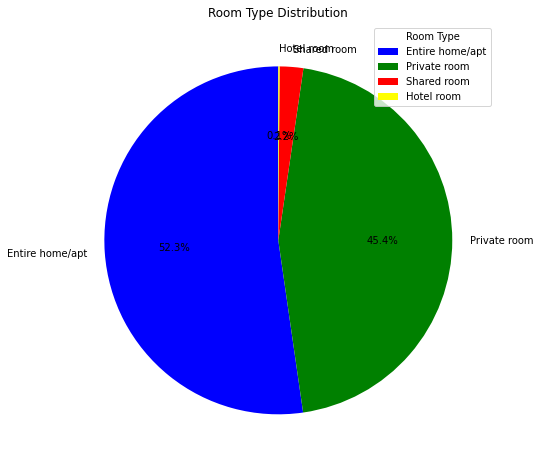

In [23]:
# Calculate the percentage distribution of 'room type'
room_type_percentage = df['room type'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = ['blue', 'green', 'red', 'yellow']  # You can customize colors as needed
plt.pie(room_type_percentage, labels=room_type_percentage.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Room Type Distribution')
plt.legend(title="Room Type")
plt.show()

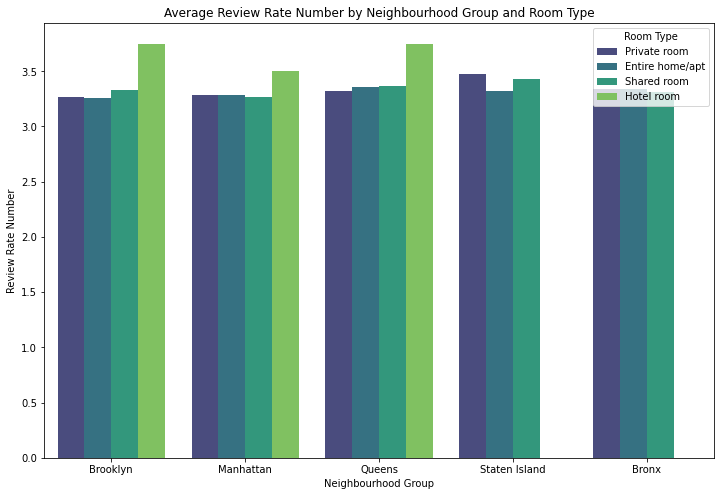

In [24]:

# Plotting a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood group', y='review rate number', hue='room type', data=df, ci=None, palette='viridis')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')
plt.legend(title='Room Type')
plt.show()


Review rates vary significantly by neighborhood group and room type. This is evident in the different heights of the bars within each neighborhood group.
Private rooms generally have the highest review rates, followed by entire homes/apartments. This pattern holds across all neighborhood groups except for Staten Island, where hotel rooms have the highest review rate.
Shared rooms tend to have the lowest review rates. This is consistent across all neighborhood groups.
Bronx has the highest average review rate for private rooms, followed by Manhattan and Queens. Brooklyn and Staten Island have relatively lower average review rates for private rooms.
Manhattan has the highest average review rate for entire homes/apartments, followed by Queens and Brooklyn. Staten Island and the Bronx have lower average review rates for entire homes/apartments.
Staten Island has the highest average review rate for hotel rooms, followed by the Bronx. Manhattan, Queens, and Brooklyn have lower average review rates for hotel rooms.
Interpretations:

Guests who book private rooms may be more likely to leave reviews than those who book other room types. This could be because private rooms offer more privacy and a more personal experience, leading to stronger opinions (positive or negative) that guests feel compelled to share.
The popularity of Airbnb in different neighborhoods may influence review rates. Neighborhoods with a higher density of Airbnb listings and a more active Airbnb community may see more reviews overall.
The quality of the listings within each neighborhood group and room type may also affect review rates. If a particular neighborhood has a higher proportion of high-quality listings, it's likely to attract more positive reviews.

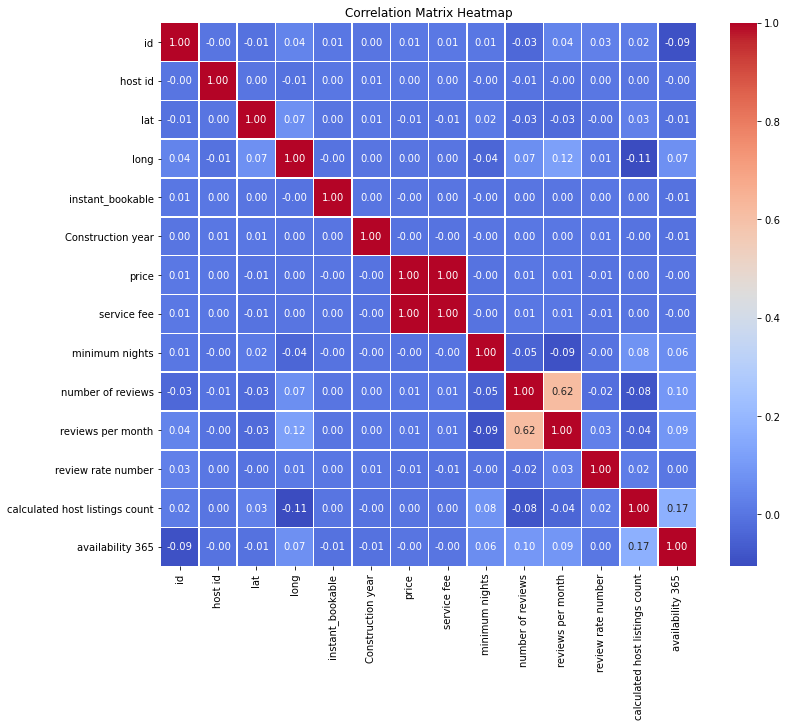

In [25]:
# correlation between the all Features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with your actual DataFrame name

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


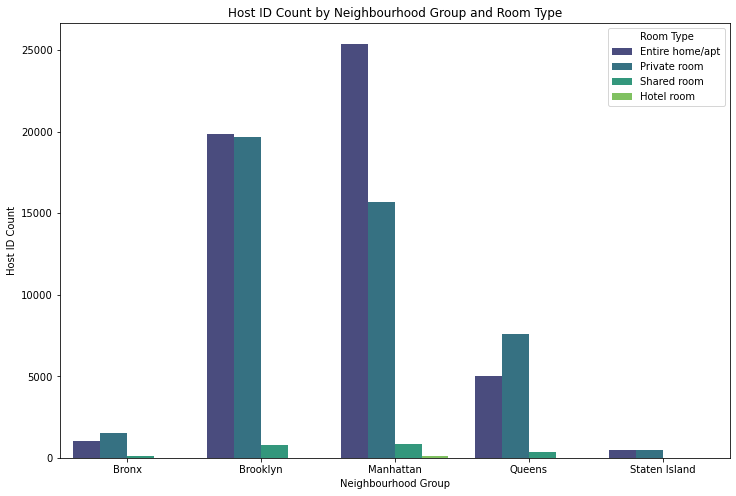

In [26]:
# Count the number of occurrences of each combination of 'neighbourhood group' and 'room type'
grouped_data = df.groupby(['neighbourhood group', 'room type']).size().reset_index(name='host id count')

# Plotting a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood group', y='host id count', hue='room type', data=grouped_data, palette='viridis')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Host ID Count')
plt.title('Host ID Count by Neighbourhood Group and Room Type')
plt.legend(title='Room Type')
plt.show()


Manhattan has the highest overall host count, followed by Brooklyn and Queens. This suggests that these neighborhoods have the most active Airbnb hosts.
The Bronx and Staten Island have lower host counts compared to the other neighborhoods. This could be due to factors such as lower population density, fewer tourist attractions, or zoning restrictions.
Entire homes/apartments are the most common type of accommodation listed in all neighborhoods. This suggests that hosts are more likely to list their entire homes rather than individual rooms.
The number of private rooms is relatively high in Manhattan and Brooklyn, but lower in the other neighborhoods. This could reflect a higher demand for private rooms in these more central and urban areas.
Shared rooms are the least common type of accommodation across all neighborhoods. This suggests that shared rooms may be less popular with guests or hosts.
Interpretations:

The popularity of Airbnb in different neighborhoods may be influenced by factors such as:
Proximity to tourist attractions
Access to public transportation
Overall neighborhood character and amenities
Local regulations and restrictions on short-term rentals
The type of accommodations offered may reflect:
The availability of housing stock in different neighborhoods
Host preferences and strategies
Guest demand for different types of accommodations
Recommendations:

Further research could investigate:
The specific factors that contribute to host concentration in certain neighborhoods
Guest preferences for different room types in different areas
The impact of Airbnb on local housing markets and communities
Hosts could consider:
The competitive landscape in different neighborhoods when deciding where to list their properties
The types of accommodations that are most in demand in their target markets
Airbnb could:
Partner with local governments to develop responsible regulations for short-term rentals
Provide tools and resources to help hosts understand local laws and best practices
Promote sustainable tourism practices that benefit both guests and communities 